# DBSCAN

[http://archive.ics.uci.edu/ml/datasets/Iris/](http://archive.ics.uci.edu/ml/datasets/Iris/)

### Bibliotecas e Carregamento

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
viridis = cm.get_cmap('viridis', 12)

#### Download e carregamento

In [3]:
df = pd.read_csv('../datasets/iris.csv')

#### Head

In [4]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Pré-processamento

In [6]:
df['Class'] = df['Class'].astype('category').cat.codes

## Avaliação gráfica

#### Heatmap da correlação

<AxesSubplot:>

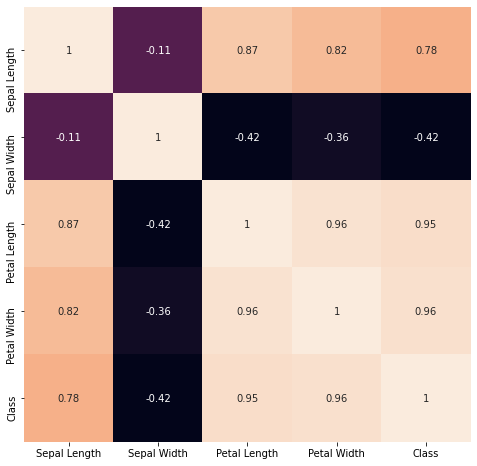

In [7]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cbar=False, annot=True)

#### Jointplot: `Petal Length` x `Petal Width` x `Class`

<AxesSubplot:xlabel='Petal Length', ylabel='Petal Width'>

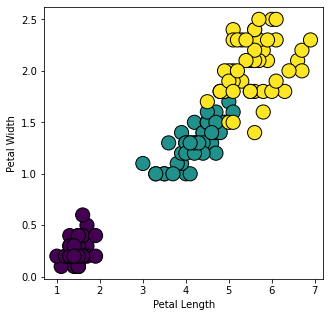

In [8]:
df.plot.scatter(
    x='Petal Length', 
    y='Petal Width', 
    c='Class',
    s=200,
    cmap='viridis',
    edgecolor='black',
    figsize=(5,5), 
    colorbar=False
)

#### Countplot `classes`

<AxesSubplot:xlabel='Class', ylabel='count'>

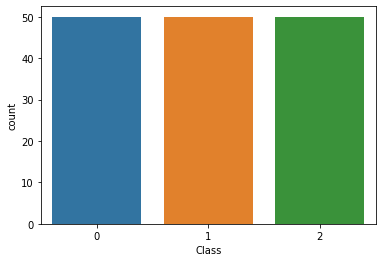

In [9]:
sns.countplot(x='Class', data=df)

Class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sepal Length, dtype: object

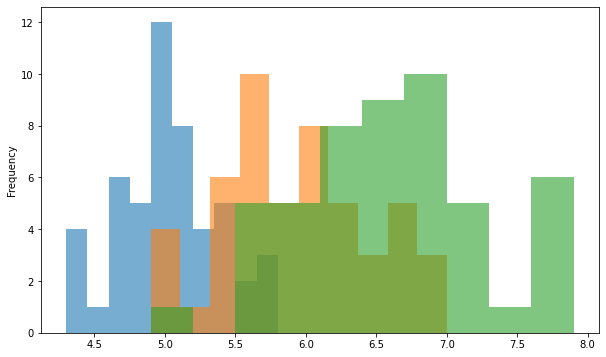

In [10]:
plt.figure(figsize=(10, 6))
df.groupby(by='Class')['Sepal Length'].plot.hist(alpha=0.6)

### Preparando dado para treinamento

In [55]:
X = df[df.columns[:-1]]

#
y = df[df.columns[-1]]

## Criando um modelo

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [14]:
from sklearn.cluster import DBSCAN

In [45]:
clu = DBSCAN(eps=0.5, min_samples=8)

In [46]:
clu.fit(df)

DBSCAN(min_samples=8)

## "Predição"

In [47]:
labels = clu.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  3,
        2,  2,  2, -1, -1, -1, -1, -1,  2,  2,  2, -1, -1,  2,  2, -1, -1,
       -1,  2, -1, -1,  2,  2, -1,  3,  3,  2, -1, -1, -1,  2,  2, -1, -1,
       -1,  2,  3,  2,  2,  2,  3,  2,  2,  2,  2,  2, -1,  3])

In [48]:
df_['Class'] = labels

In [49]:
df_['Class'].value_counts()

 0    48
 1    43
-1    30
 2    23
 3     6
Name: Class, dtype: int64

### Informações dos Labels

In [50]:
from sklearn import metrics

In [51]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # -1 é noise
n_noise_ = list(labels).count(-1)

print('Número estimado de clusters: %d' % n_clusters_)
print('Número estimado de Noise-points: %d' % n_noise_)
print('-'*50)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Número estimado de clusters: 4
Número estimado de Noise-points: 30
--------------------------------------------------
Homogeneity: 0.860
Completeness: 0.647
V-measure: 0.738


#### Função para ajudar nos treinamento

In [133]:
def train(X, y, eps=0.5, z=5, verbose=True):
    clu = DBSCAN(
        eps=eps, 
        min_samples=z
    )
    
    clu.fit(X)
    labels = clu.labels_
    
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # -1 é noise
    n_noise_ = list(labels).count(-1)

    
    print(f'Número estimado de clusters: {n_clusters_}')
    print(f'Número estimado de Noise-points: {n_noise_}')
    
    if verbose:
        print('-'*50)
        print(f'Homogeneity: {metrics.homogeneity_score(y, labels):.3f}')
        print(f'Completeness: {metrics.completeness_score(y, labels):.3f}')
        print(f'V-measure: {metrics.v_measure_score(y, labels):.3f}')
    
    return labels

#### Função para ajudar na visualização

In [96]:
def comp(datas, x, y, c, s=None, edgecolor='black', figsize=(10, 5), verbose=False):
    if verbose:
        print(f'{x} x {y}')
    
    #
    colors = cm.viridis(np.linspace(0, 1, max(datas[0][c].nunique(), datas[1][c].nunique())))
    
    #
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs = axs.reshape(1,2)[0] # Linha

    plt.subplots_adjust(wspace=0.05)

    fig.suptitle('Real x DBSCAN')
    
    for i in range(2):
        scatter0 = axs[i].scatter(
            x=datas[i][x], 
            y=datas[i][y], 
            c=colors[datas[i][c]],
            s=s,
            edgecolor=edgecolor
        )

        # Ticks
        axs[i].set_xticks([])
        axs[i].set_yticks([])

        # X Labels
        _ = axs[i].set_xlabel(x)
        
    # Y Label
    _ = axs[0].set_ylabel(y)
    
#     if verbose:
#         print()

### Comparação

Número estimado de clusters: 2
Número estimado de Noise-points: 3
--------------------------------------------------
Petal Width x Petal Length
Petal Length x Sepal Length
Sepal Width x Sepal Length


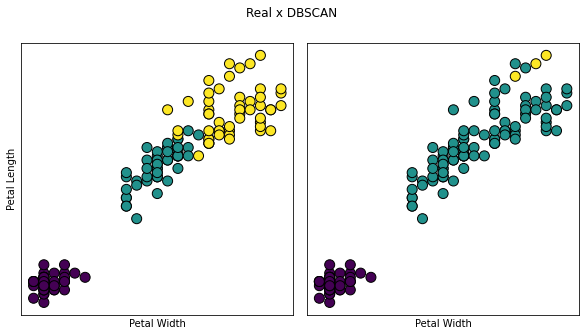

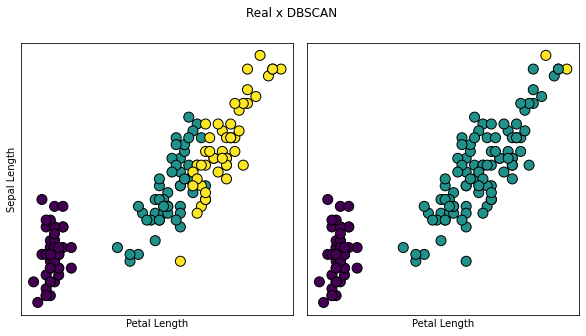

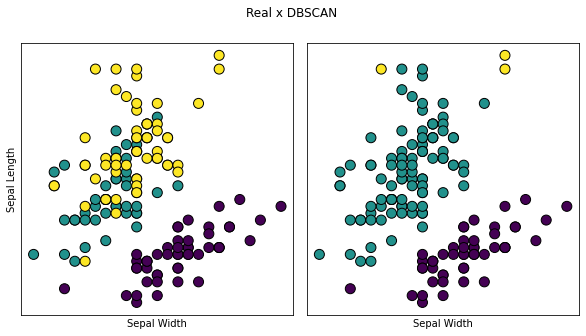

In [134]:
s = 100

labels = train(X, y, eps=1, z=18, verbose=False)
print(50*'-')

labels = pd.Series(labels)
labels = labels.rename('Class')

comp((X.join(y), X.join(labels)), 
    x='Petal Width',  y='Petal Length',  c='Class', 
    s=s, verbose=1)

comp((X.join(y), X.join(labels)), 
    x='Petal Length',  y='Sepal Length',  c='Class', 
    s=s, verbose=1)

comp((X.join(y), X.join(labels)), 
    x='Sepal Width',  y='Sepal Length',  c='Class', 
    s=s, verbose=1)
